In [82]:
import pickle

In [84]:
train_results, test_results = None, None
train_obj = open('fsmalnet_train44100.pkl', 'rb')
train_results = pickle.load(train_obj)
test_obj = open('fsmallnet_test44100.pkl', 'rb')
test_results = pickle.load(test_obj)

In [63]:
import matplotlib.pyplot as plt
def plot_test(test):
  plt.plot(test, label='Testing')
  plt.grid()
  plt.xlabel("Epoch")
  plt.yscale("log")
  plt.legend(loc='best')
  plt.show

In [64]:
# def plot_curves(train, test):
#   plt.plot(train, label='Training')
#   plt.plot(test, label='Testing')
#   plt.grid()
#   plt.xlabel("Epoch")
#   plt.legend(loc='best')
#   plt.show

In [52]:
def plot_curves(train, test):
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(train, label='Training')
    ax[0].plot(test, label='Testing')
    ax[0].grid()
    ax[0].set_xlabel("Epoch")
    ax[0].legend(loc='best')
    ax[0].set_title("Training and Testing Error (%)")

    ax[1].plot(test, label='Testing')
    ax[1].grid()
    ax[1].set_xlabel("Epoch")
    ax[1].set_yscale("log")
    ax[1].legend(loc='best')
    ax[1].set_title("Log of Testing Error (%)")
    fig.set_size_inches(12, 4)
    plt.show

In [53]:
def get_avg_fold_false_negative(data):
  ret = [0.0 for i in range(len(data[0]))]
  for i, (k,v) in enumerate(data.items()):
    for j, (key, val) in enumerate(v.items()):
      if(j >= 50): continue
      # print(val)
      ret[j] += (val["fnr"]+val["fpr"])/(5)
  return ret

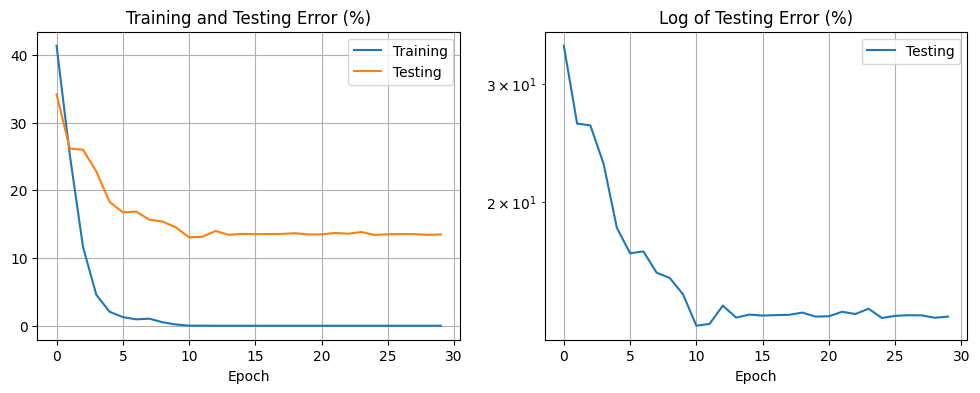

In [85]:
test_fnr = get_avg_fold_false_negative(test_results)
train_fnr = get_avg_fold_false_negative(train_results)
plot_curves(train_fnr, test_fnr)
# plot_curves(test_fnr, train_fnr)

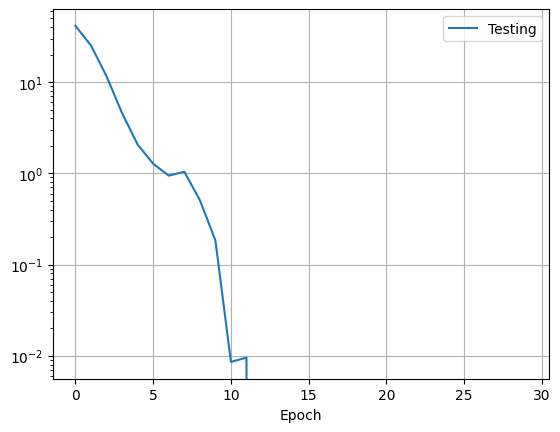

In [86]:
plot_test(train_fnr)

In [55]:
def find_min_val(test):
    return min(test), test.index(min(test))

In [87]:
find_min_val(test_fnr)

(13.054796447786353, 10)

In [88]:
find_min_val(train_fnr)

(0.0, 12)